In [81]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121
from keras.optimizers import Adam
sns.set()

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'train',
    batch_size = 32,
    shuffle = True,
    image_size = (80, 80)
)

Found 12000 files belonging to 8 classes.


In [5]:
class_names = train_data.class_names
print(class_names)

['circle', 'kite', 'parallelogram', 'rectangle', 'rhombus', 'square', 'trapezoid', 'triangle']


In [11]:
print('The number of batches in the training data:', len(train_data))
print('=======================================================')
for images, labels in train_data.take(1):
    print('The shape of images in the training data:', images[0].shape)
    print('The size of each batches:', len(images))

The number of batches in the training data: 375
The shape of images in the training data: (80, 80, 3)
The size of each batches: 32


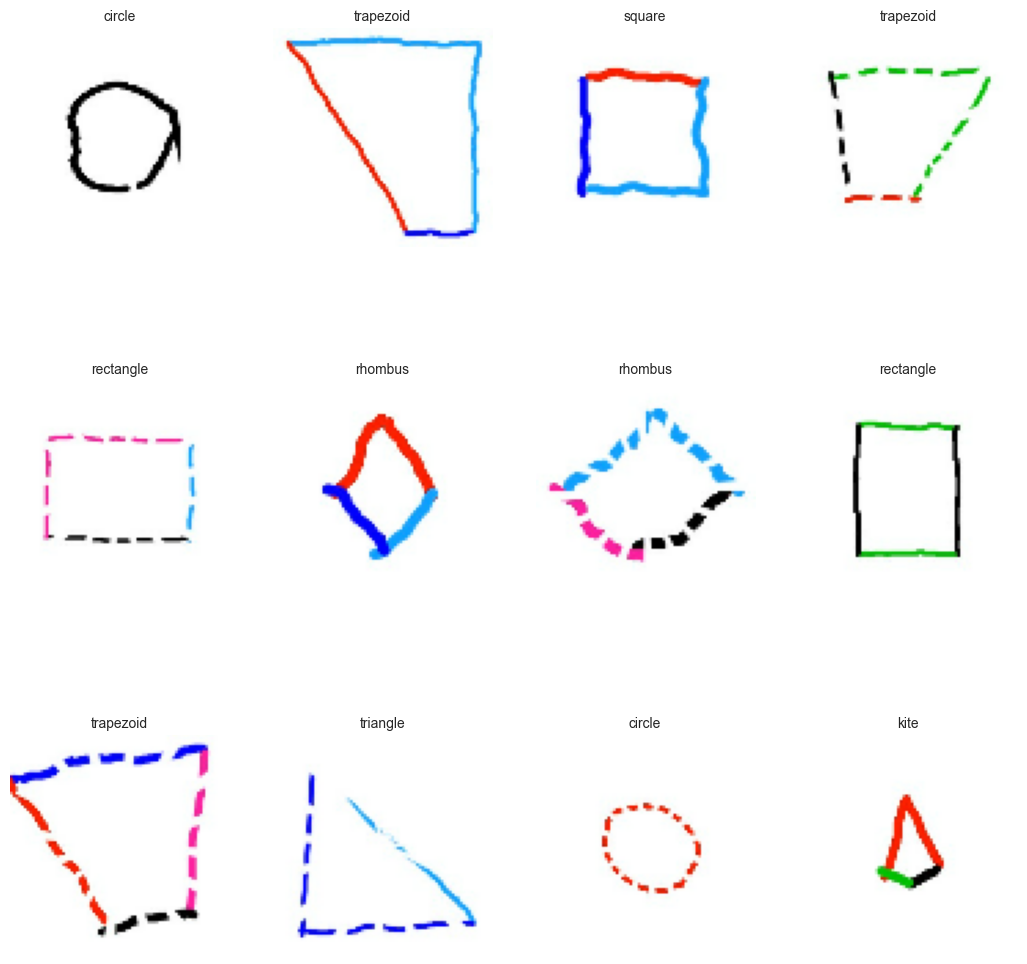

In [17]:
plt.figure(figsize = (13, 13))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        image = cv2.cvtColor(images[i].numpy().astype('uint8'), cv2.COLOR_BGR2RGB)
        pixels = np.array(image)
        plt.imshow(pixels)
        plt.title(class_names[labels[i].numpy()], fontsize = 10)
        plt.axis('off')

In [18]:
train_data = train_data.map(lambda x, y: (x / 255, y))

In [23]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'val',
    batch_size = 32, 
    image_size = (80, 80),
    shuffle = True
)

Found 4000 files belonging to 8 classes.


In [24]:
validation_data = validation_data.map(lambda x, y: (x / 255, y))

In [30]:
model = Sequential()

In [31]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

In [32]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [33]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [34]:
history = model.fit(train_data, epochs = 100, validation_data = validation_data, callbacks = [early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 212s 558ms/step - accuracy: 0.5863 - loss: 1.3789 - val_accuracy: 0.8892 - val_loss: 0.3254
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 246s 517ms/step - accuracy: 0.9440 - loss: 0.1691 - val_accuracy: 0.9682 - val_loss: 0.0933
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 192s 513ms/step - accuracy: 0.9804 - loss: 0.0616 - val_accuracy: 0.9745 - val_loss: 0.0791
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 194s 516ms/step - accuracy: 0.9884 - loss: 0.0340 - val_accuracy: 0.9728 - val_loss: 0.0784
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 519ms/step - accuracy: 0.9938 - loss: 0.0225 - val_accuracy: 0.9797 - val_loss: 0.0634
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 194s 516ms/step - accuracy: 0.9955 - loss: 0.0129 - val_accuracy: 0.9800 - val_loss: 0.0620
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 520ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9815 - val_loss: 0.0589
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 212s 565ms/step - accuracy: 

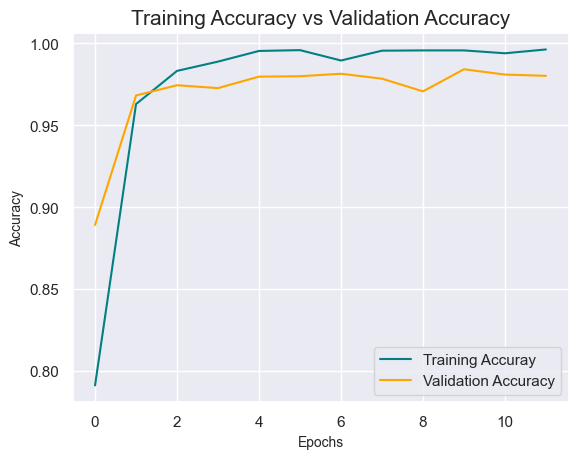

In [35]:
plt.plot(history.history['accuracy'], label = 'Training Accuray', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

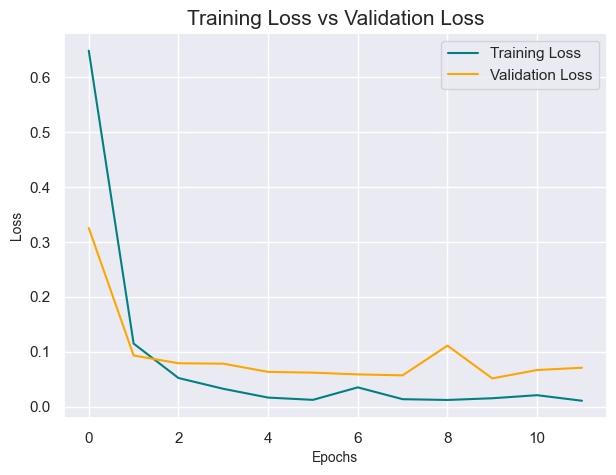

In [36]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [37]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'test',
    batch_size = 32,
    image_size = (80, 80),
    shuffle = True
)

Found 4000 files belonging to 8 classes.


In [38]:
test_data = test_data.map(lambda x, y: (x / 255, y))

In [39]:
model.evaluate(test_data)

125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9814 - loss: 0.0889


[0.0806376114487648, 0.9837499856948853]

In [54]:
X_test, y_test = [], []
for i in os.listdir('test'):
    for j in os.listdir(os.path.join('test', i)):
        img = os.path.join('test', i, j)
        image = Image.open(img)
        if image is None:
            print('Wrong path')
        else:
            image = image.resize((80, 80))
            X_test.append(image)
            y_test.append(i)

In [58]:
X_test = np.array(X_test)

In [60]:
y_p = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step


In [62]:
le = LabelEncoder()

In [63]:
y_test_le = le.fit_transform(y_test)

In [65]:
y_pred = [np.argmax(i) for i in y_p]

In [66]:
print(classification_report(y_test_le, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.98      0.98      0.98       500
           2       1.00      0.99      0.99       500
           3       0.98      1.00      0.99       500
           4       0.99      1.00      1.00       500
           5       0.99      1.00      1.00       500
           6       0.98      0.94      0.96       500
           7       0.94      0.97      0.96       500

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



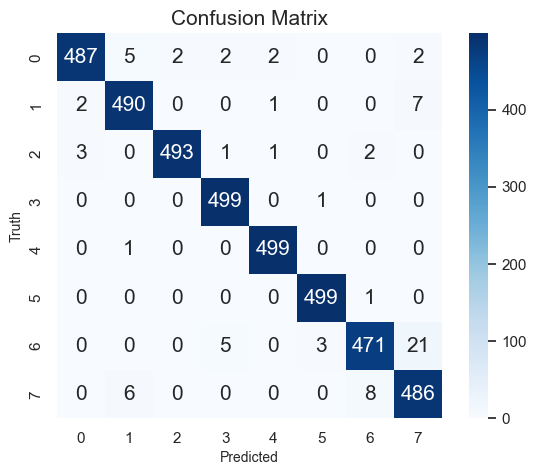

In [68]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test_le, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', 
            cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [75]:
base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [79]:
model2 = Sequential()

In [80]:
model2.add(base_model)
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model2.add(Dropout(0.5))
model2.add(Dense(8, activation = 'softmax'))

In [82]:
model2.compile(optimizer = Adam(learning_rate = 1e-4),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy']
              )

In [83]:
history2 = model2.fit(train_data, epochs = 20, validation_data = validation_data, callbacks = [early_stopping])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.5308 - loss: 1.4634 - val_accuracy: 0.9865 - val_loss: 0.1235
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 774s 2s/step - accuracy: 0.9767 - loss: 0.2004 - val_accuracy: 0.9868 - val_loss: 0.0940


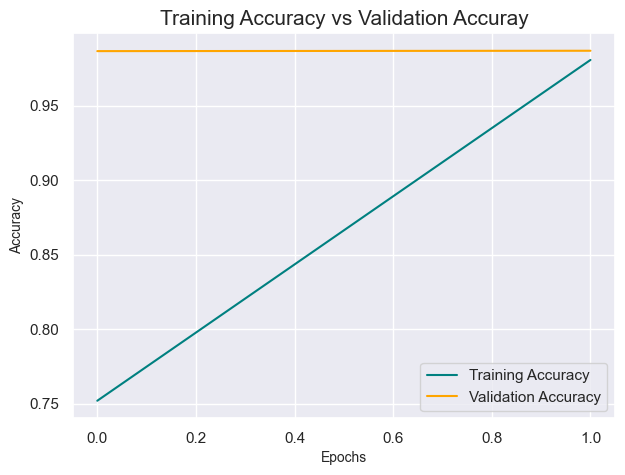

In [84]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuray', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

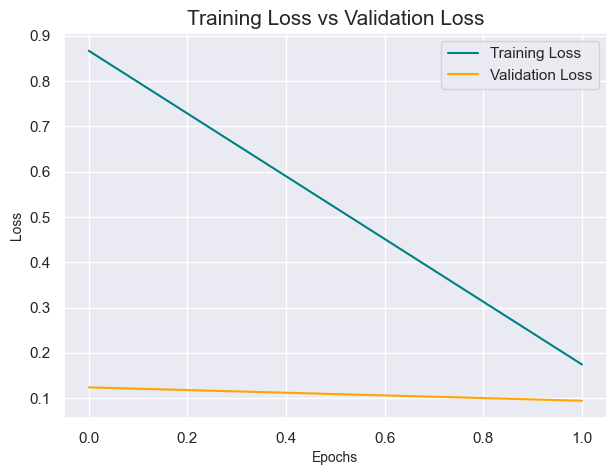

In [85]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [86]:
model2.evaluate(test_data)

125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 475ms/step - accuracy: 0.9889 - loss: 0.0864


[0.08760382235050201, 0.9900000095367432]